# Quantitative Data

### Two-Sided 
$$H_0:\mu =\mu_0$$
$$H_1:\mu \neq \mu_0$$


### Lower
$$H_0:\mu \geq \mu_0$$
$$H_1:\mu < \mu_0$$



### Upper
$$H_0:\mu \leq \mu_0$$
$$H_1:\mu > \mu_0$$


### P-value
 $$ P-Value < \alpha$$
 $$ :Reject H_0$$

## Z-Test
- [Z-Test one sample](#Z-Test-One-Sample)
- [Z-Test two sample](#Z-Test-Two-Sample)

# Z-Test One Sample

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from statsmodels.stats import weightstats as stests
import seaborn as sns

## Ex1: Mean customers = 30 ?
SD = 15 years

- $$H_0 : \mu_1 = 30$$
- $$H_1 : \mu_1 \neq 30$$

In [2]:
age_customer = pd.read_excel('Test-Z_Avg_1_pop.xlsx', sheet_name='ตาราง C', skiprows=1, index_col=1)
age_customer.drop('Unnamed: 0', axis=1, inplace=True)
print(age_customer.shape)

age_customer[['age']].describe()

(100, 32)


,age
count,100.000000
mean,36.710000
std,14.699203
min,10.000000
25%,27.000000
50%,33.000000
75%,47.000000
max,66.000000


In [4]:
# Create Distribution
def Distribution_plot(x, title):
    mode = stats.mode(x)[0][0]
    mean = np.mean(x)
    median = np.median(x)

    print('Mode:', mode)
    print('Mean:', mean)
    print('Median:', median)

    sns.distplot(x, kde=True).set_title(title)
    plt.axvline(x=mode, color='blue')
    plt.axvline(x=mean, color='black')
    plt.axvline(x=median, color='yellow')
    plt.show();

Mode: 32
Mean: 36.71
Median: 33.0


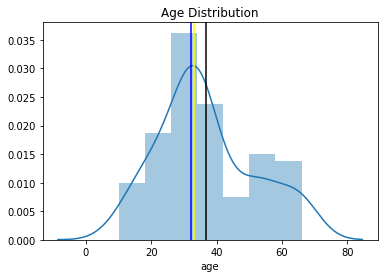

In [6]:
Distribution_plot(age_customer['age'],'Age Distribution');

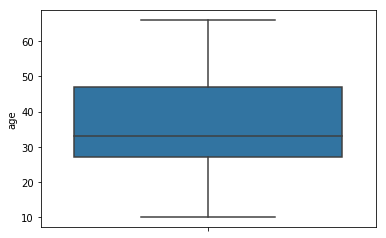

In [7]:
sns.boxplot(data=age_customer, x=age_customer['age'], orient='v')

In [8]:
# Test Normal Distribution (> 0.05)
stats.shapiro(age_customer['age'])[1]

7.501524669351056e-05

In [9]:
# Create fuction Z-test one sample
def Ztest_Result(x1, x2, value_test, alternative):
    ztest ,pval = stests.ztest(x1=x1, x2=x2, value=value_test, alternative=alternative)

    pval_lower = 1-pval 
    pval_upper = pval
    pval_two = (min(pval_lower, pval_upper))*2

    print('========================================================[Z-Test]=============================================')
    print('Z-Test: ',float(ztest))
    print('\n')

    print('========================================================[P-Value]============================================')
    print('P-Value(lower-tail): ', float(pval_lower))
    print('P-Value(upper-tail): ', float(pval_upper))
    print('P-Value(two-tail): ', float(pval_two))
    print('\n')

    print('========================================================[Result]=============================================')
    
    # interpret p-vale
    
    ptest = {'two-sided':pval_two, 'larger':pval_upper, 'smaller':pval_lower}
    if alternative in ptest:
        pvale = ptest[alternative]
        if pval < 0.05:
            print("Reject Null Hypothesis(H0)")
        else:
            print("Accept Null Hypothesis(H0)")

In [10]:
Ztest_Result(x1=age_customer['age'], x2=None, value_test=30, alternative='two-sided')

========================================================[Z-Test]=============================================
Z-Test:  4.564873380792669


========================================================[P-Value]============================================
P-Value(lower-tail):  0.9999950020409188
P-Value(upper-tail):  4.997959081131708e-06
P-Value(two-tail):  9.995918162263416e-06


========================================================[Result]=============================================
Reject Null Hypothesis(H0)


### Conclusion
Question : Mean customers = 30 ?
- Reject Null Hypothesis(H0) >>> Mean customer age != 30 (H1)

---

# Z-Test Two Sample

## Ex2: Mean scores M = W ?
SD^2 (M) = 8 scores

SD^2 (W) = 9 scores

- $$H_0 : \mu_1 -\mu_2 = 0$$
- $$H_1 : \mu_1 -\mu_2 \neq 0$$

In [11]:
score_sex = pd.read_excel('Test-Z_Avg_2_pop.xlsx', sheet_name='ตาราง C', skiprows=1, index_col=1)
score_sex.drop('Unnamed: 0', axis=1, inplace=True)
print(score_sex.shape)

score_sex = score_sex[['sex', 'posttest']]
score_sex['sex'].replace(to_replace=['ชาย', 'หญิง'], value=['Male', 'Female'], inplace=True)

score_sex[['posttest']].describe()

(100, 15)


,posttest
count,100.000000
mean,31.560000
std,3.066008
min,27.000000
25%,29.000000
50%,31.000000
75%,33.000000
max,38.000000


In [12]:
score_sex.head()

,sex,posttest
id,,
1,Male,29
2,Male,29
4,Male,36
7,Male,32
8,Male,28


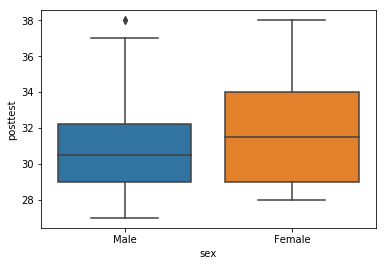

In [13]:
sns.boxplot(data=score_sex, x='sex', y='posttest')

In [17]:
# Split segments
score_male = score_sex[score_sex['sex'] == 'Male'][['posttest']]
score_female = score_sex[score_sex['sex'] == 'Female'][['posttest']]

Mode: 29
Mean: 32.1875
Median: 31.5


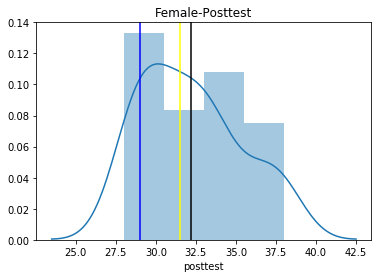

Mode: 29
Mean: 30.98076923076923
Median: 30.5


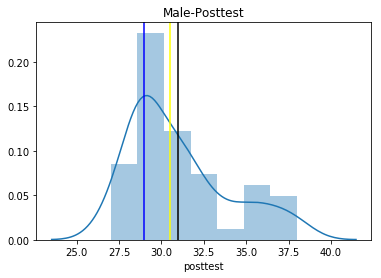

In [19]:
Distribution_plot(score_female['posttest'], 'Female-Posttest');
Distribution_plot(score_male['posttest'], 'Male-Posttest');

In [36]:
ztest ,pval1 = stests.ztest(x1=score_male['posttest'], x2=score_female['posttest'],
                            value=0, alternative='two-sided')

print('====================================================[Z-Test]===========================================')
print('Z-Test:', float(ztest))

# interpret z-test
# alpha level of 0.05 and two-tailed test
z_critical_two_tail = 1.96
if abs(ztest) > z_critical_two_tail:
    print("Reject Null Hypothesis(H0)")
else:
    print("Accept Null Hypothesis(H0)")

print('\n')
print('====================================================[P-Value]==========================================')
print('P-Value: ', float(pval1))
# interpret p-vale
if pval1 < 0.05:
    print("Reject Null Hypothesis(H0)")
else:
    print("Accept Null Hypothesis(H0)") 


====================================================[Z-Test]===========================================
Z-Test: -1.9957481428760744
Reject Null Hypothesis(H0)


====================================================[P-Value]==========================================
P-Value:  0.045961343929164726
Reject Null Hypothesis(H0)


### Conclusion
Question : Mean scores M = W ?
- Reject Null Hypothesis(H0) >>> Mean scores M != W (H1)